<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis

_Authors: Kevin Markham (DC)_

---

In [129]:
# Load pandas into python
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Learning Objectives

By the end of the lesson, you will be able to...
- **Explain** what Pandas is and how it relates to data science
- **Manipulate** Pandas DataFrames and Series
- **Filter and sort** data using Pandas
- **Manipulate** DataFrame columns
- **Know** how to handle null and missing values

<a id="pandas"></a>

## What is Pandas

- **Objective:** **Define** what Pandas is and how it relates to data science

### Pandas Data Types

Pandas is a Python library that provides two datatypes: `DataFrame` and `Series`.

**Code-along**

In [130]:
# Pandas dataframe
my_df = pd.DataFrame({'a': [1, 1, 3, 4], 'b': ['x', 'y', 'y', 'z'], 'c': [5., 6., 5., 8.]})
my_df

,a,b,c
0,1,x,5.0
1,1,y,6.0
2,3,y,5.0
3,4,z,8.0


**Pandas DataFrame**

- Each row has a label (the `row index`)
- Each column has a label (the `column index`)

In [131]:
# Pandas series
my_series = my_df.loc[:, 'a']
my_series

0    1
1    1
2    3
3    4
Name: a, dtype: int64

**Pandas Series**

Essentially a single column from a DataFrame, or a numpy array with an `index`

**Note**

It is possible to have a one-column DataFrame, which does have a `column index`. Sometimes the difference matters, so pay attention to it, especially if you are getting surprising errors.

In [132]:
one_column_df = my_df.loc[:, ['a']]
one_column_df

,a
0,1
1,1
2,3
3,4


### Pandas and Numpy

Pandas is a "wrapper" around `numpy`, so it takes advantage of the optimizations that make `numpy` fast while adding attributes and methods that are useful for data science.

In [133]:
# From pandas to numpy
my_df.values

array([[1, 'x', 5.0],
       [1, 'y', 6.0],
       [3, 'y', 5.0],
       [4, 'z', 8.0]], dtype=object)

### Vectorization

In [134]:
new_df = my_df.copy()

# don't do this!
for row_num, row in my_df.iterrows():
    new_df.loc[row_num, 'a'] = my_df.loc[row_num, 'a'] + 1

new_df

,a,b,c
0,2,x,5.0
1,2,y,6.0
2,4,y,5.0
3,5,z,8.0


For-loops are **slow** and **ugly**! Use vector and matrix math instead.

In [135]:
new_df = my_df.copy()

# do this instead
new_df.loc[:, 'a'] = new_df.loc[:, 'a'] + 1
new_df

,a,b,c
0,2,x,5.0
1,2,y,6.0
2,4,y,5.0
3,5,z,8.0


`numpy` and `pandas` automatically "broadcast" to match dimensions when possible

### DataFrame Methods and Attributes

- An **attribute** is a piece of information about a class instance. You use dot syntax to access it (e.g., my_df.shape).
- A **method** is a function that is defined for a specific class (e.g. Series, DataFrame). You use dot syntax to call it, with parentheses for passing in arguments.

In [136]:
my_df.shape

(4, 3)

In [137]:
my_df

,a,b,c
0,1,x,5.0
1,1,y,6.0
2,3,y,5.0
3,4,z,8.0


In [138]:
# View row index
my_df.index

RangeIndex(start=0, stop=4, step=1)

In [139]:
# View column index
my_df.columns

Index(['a', 'b', 'c'], dtype='object')

In [140]:
# Select first n rows, 5 by default 
#a method has parentheses, an attribute does not -- 
#attribute is stored data, method is like a function
my_df.head()

,a,b,c
0,1,x,5.0
1,1,y,6.0
2,3,y,5.0
3,4,z,8.0


In [141]:
# Select first 2 rows
my_df.head(2)

,a,b,c
0,1,x,5.0
1,1,y,6.0


In [142]:
# Select last 2 rows
my_df.tail(2)

,a,b,c
2,3,y,5.0
3,4,z,8.0


In [143]:
# See the types of the columns
my_df.dtypes

a      int64
b     object
c    float64
dtype: object

In [144]:
# Get the number of rows and columns
my_df.shape

(4, 3)

In [145]:
# Get a concise summary of DataFrame contents, including memory use
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
a    4 non-null int64
b    4 non-null object
c    4 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 176.0+ bytes


In [146]:
# Get summary statistics for numeric columns
my_df.describe()

,a,c
count,4.00,4.000000
mean,2.25,6.000000
std,1.50,1.414214
min,1.00,5.000000
25%,1.00,5.000000
50%,2.00,5.500000
75%,3.25,6.500000
max,4.00,8.000000


In [147]:
# Get summary information for non-numeric columns
my_df.describe(include=['object'])

,b
count,4
unique,3
top,y
freq,2


In [148]:
# Get summary information for all columns
my_df.describe(include='all')

,a,b,c
count,4.00,4,4.000000
unique,NaN,3,NaN
top,NaN,y,NaN
freq,NaN,2,NaN
mean,2.25,NaN,6.000000
std,1.50,NaN,1.414214
min,1.00,NaN,5.000000
25%,1.00,NaN,5.000000
50%,2.00,NaN,5.500000
75%,3.25,NaN,6.500000


In [149]:
# Get the means of the numeric columns
my_df.mean()

a    2.25
c    6.00
dtype: float64

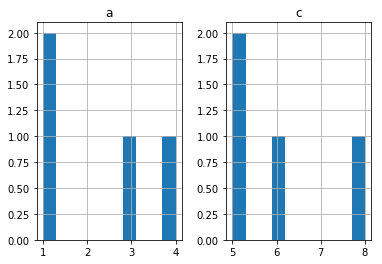

In [150]:
# Get histograms of the numeric columns
my_df.hist();
#semicolon cleans up output

### Selecting Rows and Columns

**Recommended Approach:** .loc and .iloc

In [151]:
# Select columns "a" and "b" using .loc, passing in both column names
my_df.loc[:,['a','b']]

,a,b
0,1,x
1,1,y
2,3,y
3,4,z


In [152]:
# Select columns "a" and "b" using .loc, passing in a range of column names
my_df.loc[:, :'b']

,a,b
0,1,x
1,1,y
2,3,y
3,4,z


In [153]:
my_df
#a is column 0 b is column 1 -using iloc you use location not name

,a,b,c
0,1,x,5.0
1,1,y,6.0
2,3,y,5.0
3,4,z,8.0


In [154]:
# Select columns "a" and "b" using .iloc
my_df.iloc[:, [0,1]]

,a,b
0,1,x
1,1,y
2,3,y
3,4,z


In [155]:
my_df.iloc[:,:2]
#iloc does normal python, up to but not including. loc includes because it uses name not location

,a,b
0,1,x
1,1,y
2,3,y
3,4,z


In [156]:
# Select rows 1 and 2 using .loc
my_df.loc[[1,2], :]

,a,b,c
1,1,y,6.0
2,3,y,5.0


In [157]:
# Select rows 1 and 2 using .iloc
my_df
my_df.iloc[[1,2], :]

,a,b,c
1,1,y,6.0
2,3,y,5.0


In [158]:
# Select row 1 from columns "b" and "c" using .loc. What type is the result?
thing = my_df.loc[1,['b','c']]
print(thing)
type(thing)

b    y
c    6
Name: 1, dtype: object


pandas.core.series.Series

In [159]:
# Select row 1 from columns "b" and "c" using .loc so that the result is a DataFrame
my_df.loc[[1],['b','c']]

,b,c
1,y,6.0


In [160]:
# Select row 1 from columns "b" and "c" using .iloc
my_df.iloc[1,[1,2]] #result is series

b    y
c    6
Name: 1, dtype: object

In [161]:
my_df.iloc[[1],[1,2]] #result is dataframe

,b,c
1,y,6.0


**Alternative approaches** (not recommended, but you should be able to recognize them)

In [162]:
# Dictionary-style column selection
my_df['c']

0    5.0
1    6.0
2    5.0
3    8.0
Name: c, dtype: float64

In [163]:
# Selecting multiple columns
my_df[['b', 'c']]

,b,c
0,x,5.0
1,y,6.0
2,y,5.0
3,z,8.0


In [164]:
# Slicing into a series
my_df['c'][0]

5.0

In [165]:
# Dot syntax
my_df.c

0    5.0
1    6.0
2    5.0
3    8.0
Name: c, dtype: float64

In [166]:
# 
my_df.c[1]

6.0

### Viewing Documentation

In [167]:
# Jupyter-specific
my_df.mean?

In [168]:
# General
help(my_df.mean)

Help on method mean in module pandas.core.frame:

mean(axis=None, skipna=None, level=None, numeric_only=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Return the mean of the values for the requested axis
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
    skipna : boolean, default True
        Exclude NA/null values. If an entire row/column is NA, the result
        will be NA
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series
    numeric_only : boolean, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    
    Returns
    -------
    mean : Series or DataFrame (if level specified)



Reading documentation can feel like reading a foreign language at first. It will get better!

For functions and methods, focus on two things:

- What arguments does it take?
- What does it return?

<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

In [169]:
users = pd.read_table('./data/user.tbl', sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


**Exercise (individual):** Examine the users data

In [170]:
# print the first 30 rows of `users`
users.head(30)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [171]:
# Print the last 20 rows of `users`
users.tail(20)

,user_id,age,gender,occupation,zip_code
923,924,29,M,other,11753
924,925,18,F,salesman,49036
925,926,49,M,entertainment,01701
926,927,23,M,programmer,55428
927,928,21,M,student,55408
928,929,44,M,scientist,53711
929,930,28,F,scientist,07310
930,931,60,M,educator,33556
931,932,58,M,educator,06437
932,933,28,M,student,48105


In [172]:
# Use the built-in Python function `type` to get the type of `users`
type(users)

pandas.core.frame.DataFrame

In [173]:
 # Get the row index
users.index

RangeIndex(start=0, stop=943, step=1)

In [174]:
# Get the column names
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [175]:
# Get the data types of the columns
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [176]:
# Get the number of rows and columns
users.shape

(943, 5)

In [177]:
# Get all values as a numpy array
users.values

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ..., 
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [178]:
# Get concise summary of contents of `users`
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [179]:
# Get summary statistics for `users
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [180]:
users.head(5)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [181]:
# select the "gender" column using .loc
users.loc[:,'gender']

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

In [182]:
# select rows 10-20 (inclusive) of the "gender" column using .loc
users.loc[10:20,'gender']

10    F
11    F
12    M
13    M
14    F
15    M
16    M
17    F
18    M
19    F
20    M
Name: gender, dtype: object

In [183]:
users.head(5)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [184]:
# select the "gender" column using .iloc
users.iloc[:,2]

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

In [185]:
# select rows 10-20 (inclusive) of the "gender" column using .iloc
users.iloc[10:21,2]

10    F
11    F
12    M
13    M
14    F
15    M
16    M
17    F
18    M
19    F
20    M
Name: gender, dtype: object

In [186]:
# Get the type of the object returned from the previous cell
type(users.iloc[10:21,2])

pandas.core.series.Series

In [187]:
# describe all `object` columns
users.describe(include=['object'])

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [188]:
# describe all columns, including non-numeric
users.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [189]:
# calculate the mean of the ages
users.mean(1)

0       12.5
1       27.5
2       13.0
3       14.0
4       19.0
5       24.0
6       32.0
7       22.0
8       19.0
9       31.5
10      25.0
11      20.0
12      30.0
13      29.5
14      32.0
15      18.5
16      23.5
17      26.5
18      29.5
19      31.0
20      23.5
21      23.5
22      26.5
23      22.5
24      32.0
25      37.5
26      33.5
27      30.0
28      35.0
29      18.5
       ...  
913    479.0
914    482.5
915    471.5
916    469.5
917    479.0
918    472.0
919    475.0
920    470.5
921    475.5
922    472.0
923    476.5
924    471.5
925    487.5
926    475.0
927    474.5
928    486.5
929    479.0
930    495.5
931    495.0
932    480.5
933    497.5
934    488.5
935    480.0
936    492.5
937    488.0
938    482.5
939    486.0
940    480.5
941    495.0
942    482.5
Length: 943, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116656438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1164c79e8>]], dtype=object)

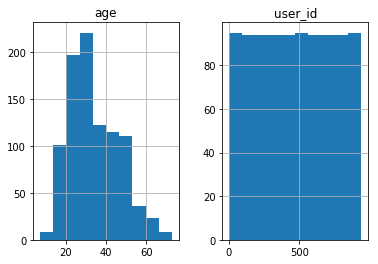

In [190]:
# draw a histogram of a column (the distribution of ages)
users.hist()

**Code-along:** Count the number of occurrences of each value

In [191]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [192]:
users.loc[:,'gender'].value_counts()

M    670
F    273
Name: gender, dtype: int64

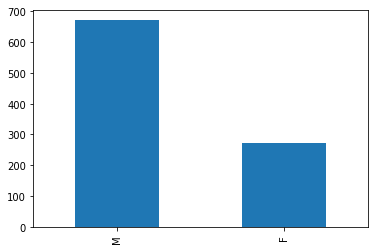

In [193]:
users.loc[:,'gender'].value_counts().plot(kind='bar');

In [194]:
# can also be used with numeric variables
users.loc[:,'age'].value_counts()

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, Length: 61, dtype: int64

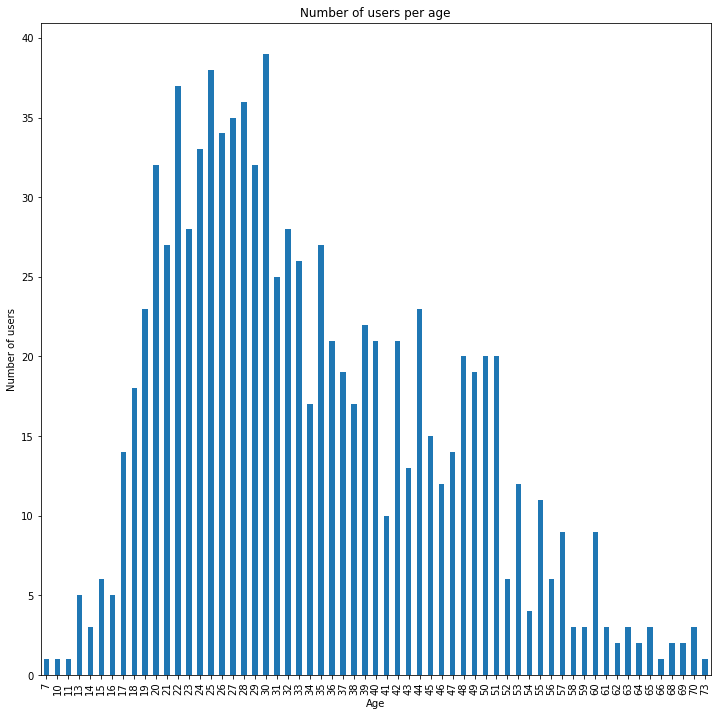

In [195]:
users.loc[:, 'age'].value_counts().sort_index().plot(kind='bar', figsize=(12,12));     # bigger plot by increasing age
plt.xlabel('Age');
plt.ylabel('Number of users');
plt.title('Number of users per age');

<a id="exercise-one"></a>
### Exercise

In [196]:
# read drinks.csv into a DataFrame called 'drinks'
drinks = pd.read_csv('./data/drinks.csv')

In [197]:
# print the head and the tail
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [198]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [199]:
# examine the default index, data types, and shape
print(drinks.index)
print(drinks.dtypes)
print(drinks.shape)

RangeIndex(start=0, stop=193, step=1)
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object
(193, 6)


In [200]:
# print the 'beer_servings' Series
drinks.loc[:,'beer_servings']

0        0
1       89
2       25
3      245
4      217
5      102
6      193
7       21
8      261
9      279
10      21
11     122
12      42
13       0
14     143
15     142
16     295
17     263
18      34
19      23
20     167
21      76
22     173
23     245
24      31
25     231
26      25
27      88
28      37
29     144
      ... 
163    128
164     90
165    152
166    185
167      5
168      2
169     99
170    106
171      1
172     36
173     36
174    197
175     51
176     51
177     19
178      6
179     45
180    206
181     16
182    219
183     36
184    249
185    115
186     25
187     21
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, Length: 193, dtype: int64

In [201]:
# calculate the average 'beer_servings' for the entire dataset
drinks.loc[:,'beer_servings'].mean()

106.16062176165804

In [202]:
# count the number of occurrences of each 'continent' value and see if it looks correct
drinks.loc[:,'continent'].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [203]:
# Does not look correct.  Where is NA, North America?
drinks.loc[:,'continent'].isnull().sum()

23

<a id="filtering-and-sorting"></a>
### Filtering and Sorting
- **Objective:** **Filter and sort** data using Pandas

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

**logical filtering: only show users with age < 20**

In [204]:
# create a Series of booleans...
# in Pandas, this comparison is performed element-wise on each row of data
young_bool = users.loc[:,'age']<20
young_bool

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
913    False
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924     True
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
Name: age, Length: 943, dtype: bool

In [205]:
find_usa = drinks.loc[:,'country']=='USA'
drinks.loc[find_usa,:]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
184,USA,249,158,84,8.7,NaN


In [206]:
# ...and use that Series to filter rows
users.loc[young_bool,:]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755


**Note**: You can also do `users[young_bool]`, but that approach gets confusing: it returns a *copy* rather than a *view*, so if you reassign values `users[young_bool]` then they won't be reflected in `users`. I prefer to use `.loc`, which returns a view, and explicitly call `.copy()` on the result when I want a copy.

In [207]:
# or, combine into a single step
users.loc[users.loc[:,'age']<20,:]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755


In [208]:
# select "occupation" column from the filtered results
users.loc[young_bool,'occupation']

29           student
35           student
51           student
56              none
66           student
67           student
100          student
109          student
141            other
178    entertainment
205          student
220          student
222          student
245          student
256          student
257          student
261          student
269          student
280          student
288             none
290          student
302          student
319          student
340          student
346          student
366          student
367          student
374    entertainment
392          student
396          student
           ...      
600           artist
608          student
617          student
618          student
619           writer
620          student
623          student
627             none
630          student
631          student
641          student
645          student
673          student
699          student
709          student
728          student
746          

In [209]:
#if you want to negate, use ~
users.loc[~young_bool,:]

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [210]:
# value_counts of resulting Series
users.loc[young_bool,'occupation'].value_counts()

student          64
other             4
none              3
writer            2
entertainment     2
artist            1
salesman          1
Name: occupation, dtype: int64

**Logical filtering with multiple conditions**

In [211]:
# ampersand for AND condition. (this is a "bitwise" AND)
# important: you MUST put parentheses around each expression because '&' has a higher precedence than '<'!
boys = (users.loc[:,'age'] < 20) & (users.loc[:,'gender'] == 'M')
users.loc[boys,:]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755
220,221,19,M,student,20685
245,246,19,M,student,28734


In [212]:
# pipe for OR condition. (this is a "bitwise" OR)
# important: you MUST put parentheses around each expression because '|' has a higher precedence than '<'!
young_or_old = (users.loc[:,'age']<20) | (users.loc[:,'age']>60)
users.loc[young_or_old,:]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
105,106,61,M,retired,55125
109,110,19,M,student,77840
141,142,13,M,other,48118


In [213]:
# preferred alternative to multiple OR conditions
(users.loc[:,'occupation'] == 'doctor') | (users.loc[:,'occupation'] == 'lawyer')
users.loc[:,'occupation'].isin(['doctor','lawyer'])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9       True
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
913    False
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924    False
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934     True
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
Name: occupation, Length: 943, dtype: bool

**Sorting**

In [214]:
# sort a Series
users.loc[:,'age'].sort_values()

29      7
470    10
288    11
879    13
608    13
141    13
673    13
627    13
812    14
205    14
886    14
848    15
280    15
460    15
617    15
178    15
100    15
56     16
579    16
549    16
450    16
433    16
620    17
618    17
760    17
374    17
903    17
645    17
581    17
256    17
       ..
89     60
307    60
930    60
751    60
468    60
463    60
233    60
693    60
933    61
350    61
105    61
519    62
265    62
857    63
776    63
363    63
844    64
422    64
317    65
650    65
563    65
210    66
348    68
572    68
558    69
584    69
766    70
802    70
859    70
480    73
Name: age, Length: 943, dtype: int64

In [215]:
# sort a DataFrame by a single column
users.sort_values('age')

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
879,880,13,M,student,83702
608,609,13,F,student,55106
141,142,13,M,other,48118
673,674,13,F,student,55337
627,628,13,M,none,94306
812,813,14,F,student,02136
205,206,14,F,student,53115


In [216]:
# use descending order instead
users.sort_values('age',ascending=False)

,user_id,age,gender,occupation,zip_code
480,481,73,M,retired,37771
802,803,70,M,administrator,78212
766,767,70,M,engineer,00000
859,860,70,F,retired,48322
584,585,69,M,librarian,98501
558,559,69,M,executive,10022
348,349,68,M,retired,61455
572,573,68,M,retired,48911
210,211,66,M,salesman,32605
650,651,65,M,retired,02903


In [217]:
# sort by multiple columns
users.sort_values(['occupation','age'])

,user_id,age,gender,occupation,zip_code
117,118,21,M,administrator,90210
179,180,22,F,administrator,60202
281,282,22,M,administrator,20057
316,317,22,M,administrator,13210
438,439,23,F,administrator,20817
508,509,23,M,administrator,10011
393,394,25,M,administrator,96819
664,665,25,M,administrator,55412
725,726,25,F,administrator,80538
77,78,26,M,administrator,61801


<a id="exercise-two"></a>
**Exercise:** Use `drinks` dataframe from earlier to complete the following.

In [218]:
# filter DataFrame to only include European countries
is_EU = drinks.loc[:,'continent'] == 'EU'
drinks.loc[is_EU,:]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [219]:
# filter DataFrame to only include European countries with wine_servings > 300
euro_wine = ((drinks.loc[:,'continent'] == 'EU')
& (drinks.loc[:,'wine_servings'] > 300))
drinks.loc[euro_wine,:]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [220]:
# calculate the average 'beer_servings' for all of Europe
drinks.loc[is_EU,'beer_servings'].mean()

193.77777777777777

In [221]:
# determine which 10 countries have the highest total_litres_of_pure_alcohol
drinks.sort_values('total_litres_of_pure_alcohol',ascending=False).iloc[:10,:]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,AS
81,Ireland,313,118,165,11.4,EU
155,Slovakia,196,293,116,11.4,EU
99,Luxembourg,236,133,271,11.4,EU


<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** **Manipulate** DataFrame columns

beer_servings                   1.000000
spirit_servings                 0.458819
wine_servings                   0.527172
total_litres_of_pure_alcohol    0.835839
Name: beer_servings, dtype: float64


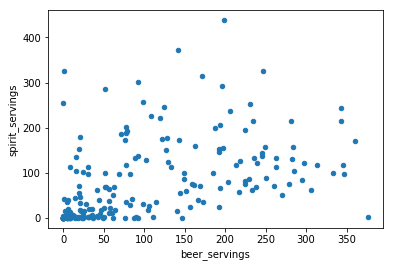

In [222]:
# Are beer servings and spirit servings correlated?
drinks.plot(kind='scatter', x='beer_servings', y='spirit_servings')

print(drinks.corr().loc[:, 'beer_servings'])  # Correlation coefficients

In [223]:
# renaming one or more columns in a single output using value mapping
drinks.rename(columns={'beer_servings':'beer','wine_servings':'wine'})
#this creates a new dataframe with the changes


,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [224]:
# renaming one or more columns in the original DataFrame - more helpful if changing more

drinks.rename(columns={'beer_servings':'beer','wine_servings':'wine'}, inplace=True)
#inplace then changes original dataframe


In [225]:
# replace all column names using a list of matching length
drink_cols = ['country','beer','spirit','wine','liters','continent']
drinks.columns = drink_cols
drinks

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [226]:
# replace during file reading (disables the header from the file)
drinks = pd.read_csv('./data/drinks.csv', header=0, names=drink_cols)
drinks

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


**Easy Column Operations**
Rather than having to reference indexes and creating for loops to do column wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each rows together.

In [227]:
# add a new column as a function of existing columns
drinks.loc[:,'servings'] = (drinks.loc[:, 'beer'] + drinks.loc[:, 'spirit']
                            + drinks.loc[:, 'wine'])
drinks

,country,beer,spirit,wine,liters,continent,servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
5,Antigua & Barbuda,102,128,45,4.9,NaN,275
6,Argentina,193,25,221,8.3,SA,439
7,Armenia,21,179,11,3.8,EU,211
8,Australia,261,72,212,10.4,OC,545
9,Austria,279,75,191,9.7,EU,545


In [228]:
drinks.loc[:,'mL'] = drinks.loc[:,'liters'] * 1000
drinks
#new column as function of old column just use math dont need for loop

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0
5,Antigua & Barbuda,102,128,45,4.9,NaN,275,4900.0
6,Argentina,193,25,221,8.3,SA,439,8300.0
7,Armenia,21,179,11,3.8,EU,211,3800.0
8,Australia,261,72,212,10.4,OC,545,10400.0
9,Austria,279,75,191,9.7,EU,545,9700.0


**Removing Columns**

In [229]:
# axis=0 for rows, 1 for columns
drinks.drop('mL',axis=1) # does not change original dataframe, gave copy with it deleted
drinks.drop('mL',axis=1, inplace=True)

In [230]:
# if you dont want to impact the original data, create a new name for returned value
drinks_mod = drinks.drop('servings',axis=1)
drinks_mod

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [231]:
# drop multiple columns
drinks.drop(['servings','wine'],axis=1)

,country,beer,spirit,liters,continent
0,Afghanistan,0,0,0.0,AS
1,Albania,89,132,4.9,EU
2,Algeria,25,0,0.7,AF
3,Andorra,245,138,12.4,EU
4,Angola,217,57,5.9,AF
5,Antigua & Barbuda,102,128,4.9,NaN
6,Argentina,193,25,8.3,SA
7,Armenia,21,179,3.8,EU
8,Australia,261,72,10.4,OC
9,Austria,279,75,9.7,EU


<a id="missing-values"></a>
### Handling Missing Values

- **Objective:** **Know** how to handle null and missing values

Pandas represents missing values as `None` or `np.NaN`.

It is important to distinguish between several classes of missing data and handle it accordingly:

- Data that was never collected
- Data that was handled incorrectly at some point (possibly by you!)
- A "null" value, e.g. "zero", "false", "not applicable", or "entered an empty string"

As noted in lesson 6, truly missing data can be handled in three ways:

- Delete the row
- Delete the column
- Impute the values based on other rows/columns

If missingness is correlated with the value of the variable in question (e.g. patients who have side effects from a trial drug tend not to come back after the first dose, so their results aren't recorded), then you are in trouble.

In [232]:
# missing values are usually excluded in calculations by default
drinks.loc[:,'continent'].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [233]:
# includes missing values
drinks.loc[:,'continent'].value_counts(dropna=False)

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [234]:
drinks.loc[:,'continent'].value_counts

<bound method IndexOpsMixin.value_counts of 0       AS
1       EU
2       AF
3       EU
4       AF
5      NaN
6       SA
7       EU
8       OC
9       EU
10      EU
11     NaN
12      AS
13      AS
14     NaN
15      EU
16      EU
17     NaN
18      AF
19      AS
20      SA
21      EU
22      AF
23      SA
24      AS
25      EU
26      AF
27      AF
28      AF
29      AF
      ... 
163     SA
164     AF
165     EU
166     EU
167     AS
168     AS
169     AS
170     EU
171     AS
172     AF
173     OC
174    NaN
175     AF
176     AS
177     AS
178     OC
179     AF
180     EU
181     AS
182     EU
183     AF
184    NaN
185     SA
186     AS
187     OC
188     SA
189     AS
190     AS
191     AF
192     AF
Name: continent, Length: 193, dtype: object>

In [235]:
# find missing values in a Series
# True if missing, False if not missing
drinks.loc[:,'continent'].isnull()

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11      True
12     False
13     False
14      True
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
163    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174     True
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184     True
185    False
186    False
187    False
188    False
189    False
190    False
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [236]:
# count the missing values - sum() works because True is 1 and False is 0
drinks.loc[:,'continent'].isnull().sum()

23

In [237]:
# True if not missing, False if missing
drinks.loc[:,'continent'].notnull()

0       True
1       True
2       True
3       True
4       True
5      False
6       True
7       True
8       True
9       True
10      True
11     False
12      True
13      True
14     False
15      True
16      True
17     False
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
163     True
164     True
165     True
166     True
167     True
168     True
169     True
170     True
171     True
172     True
173     True
174    False
175     True
176     True
177     True
178     True
179     True
180     True
181     True
182     True
183     True
184    False
185     True
186     True
187     True
188     True
189     True
190     True
191     True
192     True
Name: continent, Length: 193, dtype: bool

In [238]:
# only show rows where continent is missing
null_continent = drinks.loc[:,'continent'].isnull()
drinks.loc[null_continent,:]

,country,beer,spirit,wine,liters,continent,servings
5,Antigua & Barbuda,102,128,45,4.9,NaN,275
11,Bahamas,122,176,51,6.3,NaN,349
14,Barbados,143,173,36,6.3,NaN,352
17,Belize,263,114,8,6.8,NaN,385
32,Canada,240,122,100,8.2,NaN,462
41,Costa Rica,149,87,11,4.4,NaN,247
43,Cuba,93,137,5,4.2,NaN,235
50,Dominica,52,286,26,6.6,NaN,364
51,Dominican Republic,193,147,9,6.2,NaN,349
54,El Salvador,52,69,2,2.2,NaN,123


In [239]:
drinks.loc[null_continent,'continent'] = 'NA'
drinks

,country,beer,spirit,wine,liters,continent,servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
5,Antigua & Barbuda,102,128,45,4.9,NA,275
6,Argentina,193,25,221,8.3,SA,439
7,Armenia,21,179,11,3.8,EU,211
8,Australia,261,72,212,10.4,OC,545
9,Austria,279,75,191,9.7,EU,545


**Understanding Pandas Axis**

In [240]:
# sums "down" the 0 axis (rows) -- so, we get the sums of each column
drinks.sum(axis=0)

country      AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                     20489
spirit                                                   15632
wine                                                      9544
liters                                                   910.4
continent    ASEUAFEUAFNASAEUOCEUEUNAASASNAEUEUNAAFASSAEUAF...
servings                                                 45665
dtype: object

In [241]:
# axis=0 is the default
drinks.sum()

country      AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                     20489
spirit                                                   15632
wine                                                      9544
liters                                                   910.4
continent    ASEUAFEUAFNASAEUOCEUEUNAASASNAEUEUNAAFASSAEUAF...
servings                                                 45665
dtype: object

In [242]:
# sums "across" the 1 axis (columns) -- so, we get the sums of numeric values in the row (beer+spirit+wine+liters+...)
drinks.sum(axis=1)

0         0.0
1       554.9
2        78.7
3      1402.4
4       643.9
5       554.9
6       886.3
7       425.8
8      1100.4
9      1099.7
10      145.3
11      704.3
12      226.0
13        0.0
14      710.3
15     1128.4
16     1192.5
17      776.8
18      103.1
19       46.4
20      435.8
21      518.6
22      491.4
23      819.2
24       68.6
25     1164.3
26       82.3
27      182.3
28       94.0
29      436.0
        ...  
163     631.6
164     192.7
165     803.2
166    1140.2
167     113.0
168      34.3
169     722.4
170     441.9
171      12.1
172     115.3
173     125.1
174     726.4
175     149.3
176     161.4
177     246.2
178     113.0
179     116.3
180     984.9
181     314.8
182    1090.4
183      91.7
184     990.7
185     746.6
186     270.4
187     100.9
188     879.7
189     230.0
190      12.1
191     112.5
192     176.7
Length: 193, dtype: float64

**Find missing values in a DataFrame**

In [243]:
# Get DataFrame of booleans indicating locations of missing values in `drinks`
drinks.isnull()

,country,beer,spirit,wine,liters,continent,servings
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [244]:
# count the missing values in each column
drinks.isnull().sum()

country      0
beer         0
spirit       0
wine         0
liters       0
continent    0
servings     0
dtype: int64

**Dropping Missing Values**

In [245]:
# drop a row if ANY values are missing from any column -- can be dangerous!
drinks.dropna()

,country,beer,spirit,wine,liters,continent,servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
5,Antigua & Barbuda,102,128,45,4.9,NA,275
6,Argentina,193,25,221,8.3,SA,439
7,Armenia,21,179,11,3.8,EU,211
8,Australia,261,72,212,10.4,OC,545
9,Austria,279,75,191,9.7,EU,545


In [246]:
# drop a row only if ALL values are missing
drinks.dropna(how='all')

,country,beer,spirit,wine,liters,continent,servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
5,Antigua & Barbuda,102,128,45,4.9,NA,275
6,Argentina,193,25,221,8.3,SA,439
7,Armenia,21,179,11,3.8,EU,211
8,Australia,261,72,212,10.4,OC,545
9,Austria,279,75,191,9.7,EU,545


**Filling Missing Values**
If you noticed the continent North American, NA, does not appear in the `continent` column.  Pandas read in the original data and saw 'NA' and thought it was a missing value and converted it to a 'NaN', missing value.

In [247]:
# fill in missing values with 'NA' -- this is dangerous to do without manually verifying them!
drinks.loc[:,'continent'].fillna(value='NA')

0      AS
1      EU
2      AF
3      EU
4      AF
5      NA
6      SA
7      EU
8      OC
9      EU
10     EU
11     NA
12     AS
13     AS
14     NA
15     EU
16     EU
17     NA
18     AF
19     AS
20     SA
21     EU
22     AF
23     SA
24     AS
25     EU
26     AF
27     AF
28     AF
29     AF
       ..
163    SA
164    AF
165    EU
166    EU
167    AS
168    AS
169    AS
170    EU
171    AS
172    AF
173    OC
174    NA
175    AF
176    AS
177    AS
178    OC
179    AF
180    EU
181    AS
182    EU
183    AF
184    NA
185    SA
186    AS
187    OC
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [248]:
# modifies 'drinks' in-place
drinks.loc[:,'continent'].fillna(value='NA', inplace=True)

In [249]:
# turn off the missing value filter -- better approach!
drinks = pd.read_csv('./data/drinks.csv', header=0,names=drink_cols, na_filter=False)
drinks

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NA
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


<a id="exercise-three"></a>
**Exercise**

In [250]:
# read ufo.csv into a DataFrame called 'ufo'
ufo_data = './data/ufo.csv'
ufo = pd.read_csv(ufo_data)

In [251]:
# Inspect first 3 roads of `ufo`
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [252]:
# check the shape of the DataFrame
ufo.shape

(80543, 5)

In [253]:
# what are the three most common colors reported?
ufo.loc[:,'Colors Reported'].value_counts().head(3)

ORANGE    5216
RED       4809
GREEN     1897
Name: Colors Reported, dtype: int64

In [254]:
# Replace spaces with underscores in column names.
# Basic: Just type of a new list of column names and assign it to `ufo.columns`
# Bonus: Complete this task with a list comprehension that would work for any DataFrame.
[name.replace(' ','_') for name in ufo.columns]


['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time']

In [255]:
# for reports in VA, what's the most common city?
in_va = ufo.loc[:,'State'] == 'VA'
ufo.loc[in_va, 'City'].value_counts().head(1)

Virginia Beach    110
Name: City, dtype: int64

In [256]:
# print a DataFrame containing only reports from Arlington, VA
(ufo.loc[in_va,:]) & (ufo.loc[:,'City'] == 'Arlington')

ValueError: operands could not be broadcast together with shapes (7910,) (5,) 

In [ ]:
# count the number of missing values in each column
ufo.isnull().sum()

In [ ]:
# how many rows remain if you drop all rows with any missing values?
ufo.dropna().shape[0]

<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-Apply-Combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the mean() function to find the average beer consumption.
- **Combine:** We now combine the continent names with the mean()s to produce a summary of our findings.

In [277]:
# for each continent, calculate the mean beer servings
drinks.groupby('continent')['beer'].mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

In [276]:
import numpy as np
# for each continent, calculate the mean of all numeric columns
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [275]:
# for each continent, describe beer servings
drinks.groupby('continent')['beer'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [274]:
# "agg" allows you to apply an arbitrary aggregation function to each column
drinks.groupby('continent')['beer'].agg(['count','mean','min','max', np.std])

,count,mean,min,max,std
continent,,,,,
AF,53,61.471698,0,376,80.557816
AS,44,37.045455,0,247,49.469725
EU,45,193.777778,0,361,99.631569
NA,23,145.434783,1,285,79.621163
OC,16,89.687500,0,306,96.641412
SA,12,175.083333,93,333,65.242845


In [281]:
# for each continent, describe all numeric columns
drinks.groupby('continent').describe()

beer                                                             \
          count        mean        std   min     25%    50%     75%    max   
continent                                                                    
AF         53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0   
AS         44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0   
EU         45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0   
NA         23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0   
OC         16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0   
SA         12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0   

          liters            ...    spirit         wine                         \
           count      mean  ...       75%    max count        mean        std   
continent                   ...                                                 
AF          53.0  3.007547  ...     19.00  152.0  53.0   16.264151  38.846419   
AS          44.0  2.170455  ...     98.00  326.0  44.0    9.068182  21.667034   
EU          45.0  8.617778  ...    173.00  373.0  45.0  142.222222  97.421738   
NA          23.0  5.995652  ...    190.50  438.0  23.0   24.521739  28.266378   
OC          16.0  3.381250  ...     65.25  254.0  16.0   35.625000  64.555790   
SA          12.0  6.308333  ...    148.75  302.0  12.0   62.416667  88.620189   

                                            
           min   25%    50%     75%    max  
continent                                   
AF         0.0   1.0    2.0   13.00  233.0  
AS         0.0   0.0    1.0    8.00  123.0  
EU         0.0  59.0  128.0  195.00  370.0  
NA         1.0   5.0   11.0   34.00  100.0  
OC         0.0   1.0    8.5   23.25  212.0  
SA         1.0   3.0   12.0   98.50  221.0  

[6 rows x 32 columns]

In [282]:
# for each continent, count the number of rows
drinks.groupby('continent')['continent'].count()
# first use a groupby, then use .value_counts()

continent
AF    53
AS    44
EU    45
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [283]:
drinks.loc(:,'continent').value_counts()

SyntaxError: invalid syntax (<ipython-input-283-1a265aa79371>, line 1)

<a id="exercise-four"></a>
**Exercise**

Use the `users` dataframe to complete the following exercises.

In [ ]:
users.head(3)

In [268]:
# for each occupation in 'users', count the number of occurrences
users.groupby('occupation').count()

,user_id,age,gender,zip_code
occupation,,,,
administrator,79,79,79,79
artist,28,28,28,28
doctor,7,7,7,7
educator,95,95,95,95
engineer,67,67,67,67
entertainment,18,18,18,18
executive,32,32,32,32
healthcare,16,16,16,16
homemaker,7,7,7,7


In [284]:
users.loc(:, 'occupation'].value_counts()

SyntaxError: invalid syntax (<ipython-input-284-69fd369ad8a2>, line 1)

In [269]:
# for each occupation, calculate the mean age
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [271]:
# for each occupation, calculate the minimum and maximum ages
users.groupby('occupation')['age'].agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [273]:
# for each combination of occupation and gender, calculate the mean age
users.groupby(['occupation','gender']).mean()

user_id        age
occupation    gender                       
administrator F       443.944444  40.638889
              M       420.069767  37.162791
artist        F       432.153846  30.307692
              M       469.000000  32.333333
doctor        M       533.714286  43.571429
educator      F       454.730769  39.115385
              M       471.492754  43.101449
engineer      F       806.500000  29.500000
              M       445.553846  36.600000
entertainment F       780.000000  31.000000
              M       350.250000  29.000000
executive     F       373.000000  44.000000
              M       427.413793  38.172414
healthcare    F       568.454545  39.818182
              M       354.000000  45.400000
homemaker     F       367.166667  34.166667
              M       898.000000  23.000000
lawyer        F       285.000000  39.500000
              M       373.900000  36.200000
librarian     F       449.137931  40.000000
              M       535.954545  40.000000
marketing     F       443.300000  37.200000
              M       434.375000  37.875000
none          F       521.750000  36.500000
              M       246.200000  18.600000
other         F       474.666667  35.472222
              M       578.246377  34.028986
programmer    F       411.166667  32.166667
              M       437.966667  33.216667
retired       F       860.000000  70.000000
              M       489.230769  62.538462
salesman      F       637.666667  27.000000
              M       447.333333  38.555556
scientist     F       611.666667  28.333333
              M       449.428571  36.321429
student       F       497.533333  20.750000
              M       479.404412  22.669118
technician    F       938.000000  38.000000
              M       480.692308  32.961538
writer        F       536.052632  37.631579
              M       466.230769  35.346154

----

<a id="joining-dataframes"></a>
### Joining (Merging) DataFrames

"Tidy data" is data that is organized as follows:

- One variable per column
- One observation per row
- One type of observational unit per table

In [285]:
# Load movie titles
movie_cols = ['movie_id', 'title']
movies_path = './data/movies.tbl'
movies = pd.read_table(movies_path, sep='|', header=None, names=movie_cols, usecols=[0, 1], encoding='latin-1')
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [286]:
# Load movie ratings
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_path = './data/movie_ratings.tsv'
ratings = pd.read_table(ratings_path, sep='\t', header=None, names=rating_cols)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Now if we want to know the title associated with a particular rating, we match up the rows of the two tables by `movie_id`.

SQL calls this "matching up" operation a **join**. Pandas calls it **merge**.

In [287]:
# merge 'movies' and 'ratings' (inner join on 'movie_id')
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [288]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

(1682, 2)
(100000, 4)
(100000, 5)


This "normalized" format is conceptually nice, and it saves space.

Storing data in a "denormalized" format (e.g. by storing move titles in the table with ratings) is sometimes justified to avoid expensive join operations, especially in web programming.

<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [ ]:
# apply an arbitrary function to each value of a Pandas column, storing the result in a new column
users.loc[:, 'under30'] = users.loc[:, 'age'].apply(lambda age: age < 30)

In [ ]:
# apply an arbitrary function to each row of a DataFrame, storing the result in a new column
#  (remember that by default axis=0. Since we want to go row-by-row, we set axis=1)
users.loc[:, 'under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)

In [ ]:
# map existing values to a different set of values
users['is_male'] = users.loc[:, 'gender'].map({'F':0, 'M':1})

In [ ]:
# replace all instances of a value in a column (must match entire value)
ufo.loc[:, 'State'].replace('Fl', 'FL', inplace=True)

In [ ]:
# string methods are accessed via 'str'
ufo.loc[:, 'State'].str.upper()                               # converts to uppercase

In [ ]:
# checks for a substring
ufo.loc[:, 'Colors_Reported'].str.contains('RED', na='False') 

In [ ]:
# convert a string to the datetime format (this is often slow -- consider doing it in the read_csv() method)
ufo.loc[:, 'Time'] = pd.to_datetime(ufo.loc[:, 'Time'])
ufo.loc[:, 'Time'].dt.hour                        # datetime format exposes convenient attributes

In [ ]:
(ufo.Time.max() - ufo.Time.min()).days  # also allows you to do datetime "math"

In [ ]:
# setting and then removing an index
ufo.set_index('Time', inplace=True)
ufo

In [ ]:
ufo.reset_index(inplace=True)
ufo

In [ ]:
# change the data type of a column
drinks.loc[:, 'beer'] = drinks.loc[:, 'beer'].astype('float')

In [ ]:
# create dummy variables for 'continent' and exclude first dummy column
continent_dummies = pd.get_dummies(drinks.loc[:, 'continent'], prefix='cont').iloc[:, 1:]
continent_dummies

In [ ]:
# concatenate two DataFrames (axis=0 for rows, axis=1 for columns)
drinks = pd.concat([drinks, continent_dummies], axis=1)
drinks

<a id="uncommon-features"></a>
### OPTIONAL: Other Less Used Features of Pandas

In [ ]:
# detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # count of duplicates
users[users.duplicated()]   # only show duplicates
users.drop_duplicates()     # drop duplicate rows
users.age.duplicated()      # check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # specify columns for finding duplicates

In [ ]:
# convert a range of values into descriptive groups
drinks['beer_level'] = 'low'    # initially set all values to 'low'
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # change 101-200 to 'med'
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # change 201-400 to 'high'

In [ ]:
# display a cross-tabulation of two Series
pd.crosstab(drinks.loc[:, 'continent'], drinks.beer_level)

In [ ]:
# convert 'beer_level' into the 'category' data type
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # sorts by the categorical ordering (low to high)

In [ ]:
# limit which rows are read when reading in a file -- useful for large files!
pd.read_csv('./data/drinks.csv', nrows=10)           # only read first 10 rows
pd.read_csv('./data/drinks.csv', skiprows=[1, 2])    # skip the first two rows of data

In [ ]:
# write a DataFrame out to a CSV
drinks.to_csv('drinks_updated.csv')                 # index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # ignore index

In [ ]:
# create a DataFrame from a dictionary
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# create a DataFrame from a list of lists
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

In [ ]:
# randomly sample a DataFrame
import numpy as np
mask = np.random.rand(len(drinks)) < 0.66   # create a Series of booleans
train = drinks[mask]                        # will contain around 66% of the rows
test = drinks[~mask]                        # will contain the remaining rows

In [ ]:
# change the maximum number of rows and columns printed ('None' means unlimited)
pd.set_option('max_rows', None)     # default is 60 rows
pd.set_option('max_columns', None)  # default is 20 columns
print(drinks)

In [ ]:
# reset options to defaults
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# change the options temporarily (settings are restored when you exit the 'with' block)
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

In this notebook, the most important things to familiarize yourself with are the basics:

- Manipulating DataFrames and Series
- Filtering Columns and Rows
- Handling Missing Values
- Split-Apply-Combine (this one takes some practice!)

You will pick up more over time. Google, Stack Overflow, and the Pandas documentation are your friends!

# Questions?

# Exit Tickets

https://docs.google.com/forms/d/e/1FAIpQLSfvZxGW3CHmZzIhNqz-5uzMeDTQHHDOH8G2ovTPbT5U6Q8KLA/viewform?usp=send_form